# Imports Needed for Analysis 

In [275]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import and Display all DataFrames

In [276]:
seed_records_df = pd.read_csv('seed_records_processed.csv')
display(seed_records_df) 

,SEED,OVERALL RECORD,BEST FINISH,WINS,LOSSES,BEST FINISH TYPE,BEST FINISH COUNT
0,1,534-134,Champions (26 times),534,134,Champion,26
1,2,373-155,Champions (five times),373,155,Champion,5
2,3,294-156,Champions (four times),294,156,Champion,4
3,4,250-158,Champion (two times),250,158,Champion,2
4,5,183-160,Runner-up (four times),183,160,Runner-up,4
5,6,168-159,Champions (once),168,159,Champion,1
6,7,141-159,Champions (once),141,159,Champion,1
7,8,113-159,Champions (once),113,159,Champion,1
8,9,98-160,Final Four (two times),98,160,Final Four,2
9,10,97-159,Final Four (once),97,159,Final Four,1


In [277]:
seed_pct_df = pd.read_csv('seed_pct_records_processed.csv')
display(seed_pct_df)

,SEED VS. SEED.,W-L,PCT.,Seed_1,Seed_2,Wins,Losses
0,1 vs. 16,158-2,0.988,1,16,158,2
1,2 vs. 15,149-11,0.931,2,15,149,11
2,3 vs. 14,137-23,0.856,3,14,137,23
3,4 vs. 13,127-33,0.794,4,13,127,33
4,5 vs. 12,103-57,0.644,5,12,103,57
5,6 vs. 11,98-62,0.613,6,11,98,62
6,7 vs. 10,97-62,0.610,7,10,97,62
7,8 vs. 9,77-83,0.481,8,9,77,83


In [278]:
games_df = pd.read_csv('combined_games_processed.csv')
display(games_df) 

,year,round_of,winning_team_name,winning_team_seed,winning_team_score,losing_team_name,losing_team_seed,losing_team_score
0,2024,64,UConn,1,91,Stetson,16,52
1,2024,64,Northwestern,9,77,Florida Atlantic,8,65
2,2024,64,San Diego State,5,69,UAB,12,65
3,2024,64,Yale,13,78,Auburn,4,76
4,2024,64,Duquesne,11,71,BYU,6,67
...,...,...,...,...,...,...,...,...
2389,1985,16,Memphis State,2,59,Boston College,11,57
2390,1985,8,Memphis State,2,63,Oklahoma,1,61
2391,1985,4,Georgetown,1,77,St Johns,1,59
2392,1985,4,Villanova,8,52,Memphis St.,2,45


In [279]:
upsets_df = pd.read_csv('combined_upsets_processed.csv')
display(upsets_df) 

,year,round_of,winning_team_name,winning_team_seed,winning_team_score,losing_team_name,losing_team_seed,losing_team_score
0,2024,64,Northwestern,9,77,Florida Atlantic,8,65
1,2024,64,Yale,13,78,Auburn,4,76
2,2024,64,Duquesne,11,71,BYU,6,67
3,2024,16,Illinois,3,72,Iowa State,2,69
4,2024,64,Michigan State,9,69,Mississippi State,8,51
...,...,...,...,...,...,...,...,...
676,1985,32,Louisiana Tech,5,79,Ohio State,4,67
677,1985,32,Boston College,11,74,Duke,3,73
678,1985,8,Memphis State,2,63,Oklahoma,1,61
679,1985,4,Villanova,8,52,Memphis St.,2,45


# Analysis Question #1: 
## In the first round, is there a higher seed that is more likely to lose as a result of an upset/ is there a lower seed that’s more likely to win as a result of an upset? 

In [280]:
#Find out how many times each higher seed has been upset
first_round_upsets = upsets_df[upsets_df['round_of'] == 64]
high_seed_loss_counts = first_round_upsets['losing_team_seed'].value_counts().sort_index()
print(high_seed_loss_counts)
#Find the average losing seed
avg_losing_seed = first_round_upsets['losing_team_seed'].mean()
print(round(avg_losing_seed,2))

losing_team_seed
1     2
2    11
3    23
4    33
5    53
6    60
7    59
8    81
Name: count, dtype: int64
5.93


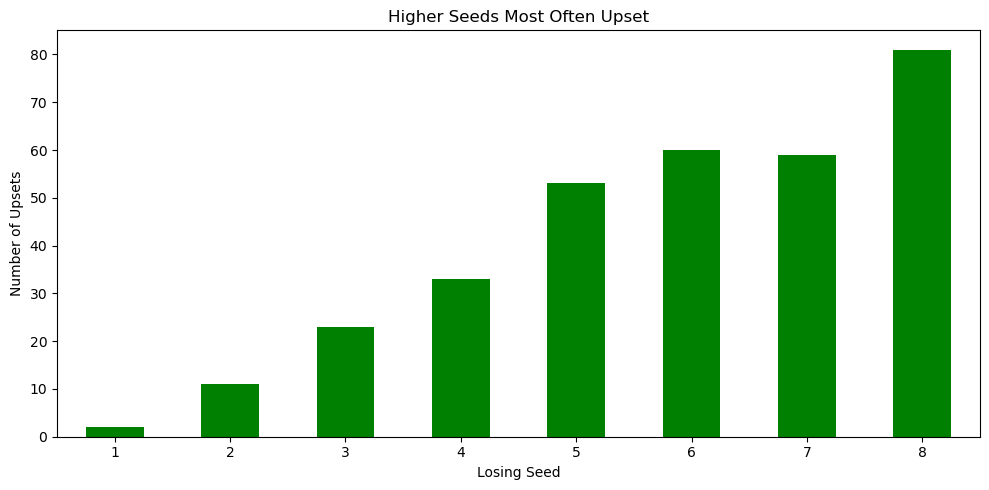

In [281]:
# Visualize it 
plt.figure(figsize=(10, 5))
high_seed_loss_counts.plot(kind='bar', color = 'green')
plt.title('Higher Seeds Most Often Upset')
plt.xlabel('Losing Seed')
plt.ylabel('Number of Upsets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Answer: Seed No.8 has been upset the most followed by seed No.6 and No.7.  

In [282]:
#Find out how many times each lower seed as pulled off an upset
first_round_upsets = upsets_df[upsets_df['round_of'] == 64]
low_seed_win_counts = first_round_upsets['winning_team_seed'].value_counts().sort_index()
print(low_seed_win_counts)
#Find the average winning seed
avg_winning_seed = first_round_upsets['winning_team_seed'].mean()
print(round(avg_winning_seed,2))

winning_team_seed
9     81
10    59
11    60
12    53
13    33
14    23
15    11
16     2
Name: count, dtype: int64
11.07


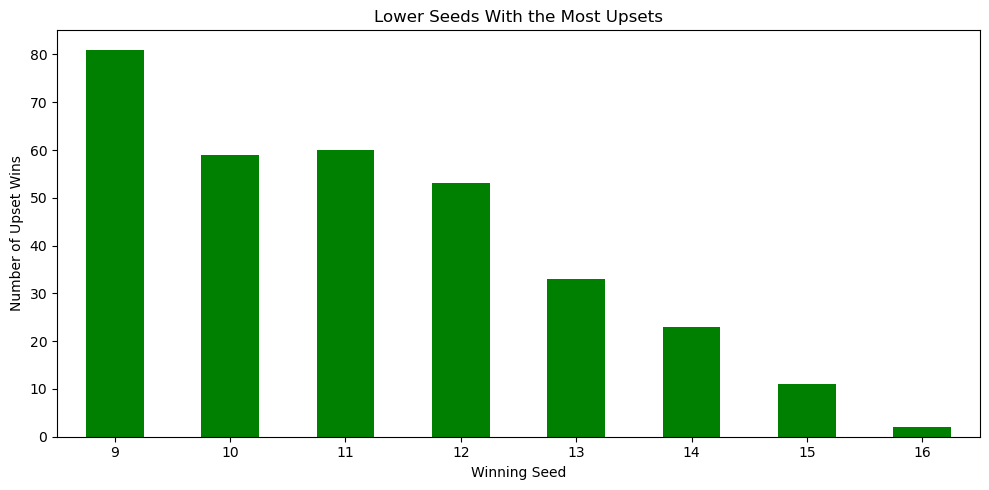

In [283]:
#Visualize it
plt.figure(figsize=(10, 5))
low_seed_win_counts.plot(kind='bar', color='green')
plt.title('Lower Seeds With the Most Upsets')
plt.xlabel('Winning Seed')
plt.ylabel('Number of Upset Wins')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Answer: The seeds that are most likely to win as a result of an upset in the first round are, No.9 followed by No.11 and No.10

# Analysis Question 2:
## Do some seeds win significantly more than other seeds? 

### H0: There is no significant difference in how often seeds win the championship compared to how often they appear in the championship.
### H1: There is a significant difference in some seeds winning more or less than expected based on how often they appear in the championship game. 

In [284]:
# Get the seeds that have won at least one champtionship
champ_df = seed_records_df[seed_records_df['BEST FINISH TYPE'] == 'Champion'].copy()
# Find the number of total games played by each seed
champ_df['Total Games'] = champ_df['WINS'] + champ_df['LOSSES']

# Make the observed varaible to be the number of championship games won
observed = champ_df['BEST FINISH COUNT']

# Find the expected number of championship wins based off total games played
total_titles = observed.sum()
champ_df['Expected Wins'] = (champ_df['Total Games'] / champ_df['Total Games'].sum()) * total_titles
expected = champ_df['Expected Wins']

# Run the Chi-Square Test 
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"p-value: {p_value}")
alpha = 0.05
if p_value <= alpha:
    print("Reject H0: Some seeds win the championship more often than others based off their championship appearance.")
else:
    print("Fail to reject H0: There is no significant difference between seed appearances and championship wins.")

p-value: 1.606767619528587e-07
Reject H0: Some seeds win the championship more often than others based off their championship appearance.


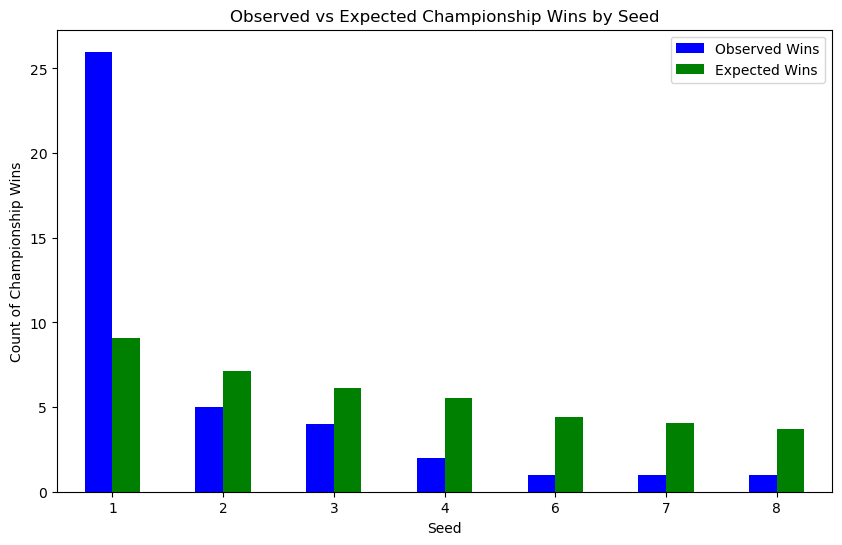

In [285]:
Q2_df = champ_df.set_index('SEED')[['BEST FINISH COUNT', 'Expected Wins']]
Q2_df.plot(kind='bar', figsize=(10, 6) , color = ['blue', 'green'])
plt.xlabel('Seed')
plt.ylabel('Count of Championship Wins')
plt.title('Observed vs Expected Championship Wins by Seed')
plt.legend(['Observed Wins', 'Expected Wins'])
plt.xticks(rotation=1) 
plt.show()

# Analysis Question 3:
# Is there a relationship between a seed’s overall tournament win percentage and the percentage of total Final Four appearances that seed accounts for?

In [286]:
# Get all Final Four Games
final_four_df = games_df[games_df['round_of'] == 4]

# Get the seeds of the Final Four games
seeds_in_final_four = pd.concat([
    final_four_df[['winning_team_seed']].rename(columns={'winning_team_seed': 'Seed'}),
    final_four_df[['losing_team_seed']].rename(columns={'losing_team_seed': 'Seed'})
])

#get the count for each seed 
seed_counts = seeds_in_final_four['Seed'].value_counts().sort_index().reset_index()
seed_counts.columns = ['Seed', 'Final Four Appearances']

# get the percentage of Final Four appereances for each seed
total = seed_counts['Final Four Appearances'].sum()
seed_counts['Percent of Final Four Appearances'] = ((seed_counts['Final Four Appearances'] / total) * 100).round(2)

In [287]:
#Overall win percentage
wins = games_df.groupby('winning_team_seed').size().reset_index(name='Wins')
losses = games_df.groupby('losing_team_seed').size().reset_index(name='Losses')

overall_record = pd.merge(wins, losses, left_on='winning_team_seed', right_on='losing_team_seed', how='outer')

overall_record['Seed'] = overall_record['winning_team_seed']
overall_record['Wins'] = overall_record['Wins']
overall_record['Losses'] = overall_record['Losses']
overall_record = overall_record[['Seed', 'Wins', 'Losses']]

overall_record['Overall Win Percentage'] = (overall_record['Wins'] / (overall_record['Wins'] + overall_record['Losses']) * 100).round(2)

In [288]:
merged_df = pd.merge(seed_counts, overall_record, on='Seed', how='left')

merged_df = merged_df.sort_values('Seed')

display(merged_df)

,Seed,Final Four Appearances,Percent of Final Four Appearances,Wins,Losses,Overall Win Percentage
0,1,51,36.43,483,123,79.70
1,2,32,22.86,361,146,71.20
2,3,17,12.14,283,148,65.66
3,4,12,8.57,232,147,61.21
4,5,9,6.43,180,151,54.38
5,6,2,1.43,158,152,50.97
6,7,3,2.14,139,151,47.93
7,8,6,4.29,110,153,41.83
8,9,1,0.71,96,152,38.71
9,10,1,0.71,93,155,37.50


In [289]:
# Get the correlation and see if it is statistcally significant 
corr_coef, p_value = pearsonr(merged_df['Overall Win Percentage'], merged_df['Final Four Appearances'])

print(f"Correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.4f}")

Correlation coefficient: 0.895
P-value: 0.0002


### Answer: There is a positive correlation between a seeds overall tournament win percentage and their number of Final Four round appearances. This is statistically signifcant, there is a less than 1% chance the results are due to randomness. 

# Analysis Question 4: 
# Predict how many rounds a seed will go based on their wins, losses, best finish, and best finish count.

### Multiple Linear Regression 

In [290]:
#Get the number of rounds won 
winning_rounds = games_df.groupby(['year', 'winning_team_name']).size().reset_index(name = 'rounds_won')

# get the varaibles to be used in the regression 
variables = games_df[['year', 'winning_team_name', 'winning_team_seed']].drop_duplicates()
variables = variables.merge(winning_rounds, how='left', on=['year', 'winning_team_name'])

# Merge variables with seed_records_df 
seed_records_df2 = seed_records_df[['SEED', 'WINS', 'LOSSES', 'BEST FINISH TYPE', 'BEST FINISH COUNT']]
variables = variables.merge(seed_records_df2, how='left', left_on='winning_team_seed', right_on='SEED')

# Create dummy variables for best finish type 
variables = pd.get_dummies(variables, columns=['BEST FINISH TYPE'])

finish_type_columns = [
    'BEST FINISH TYPE_Champion',
    'BEST FINISH TYPE_Final Four',
    'BEST FINISH TYPE_Elite Eight',
    'BEST FINISH TYPE_Sweet 16',
    'BEST FINISH TYPE_Runner-up',
    'BEST FINISH TYPE_Second round'
]

# Run the regression
X = features[['winning_team_seed', 'WINS', 'LOSSES', 'BEST FINISH COUNT'] + finish_type_columns]
y = features['rounds_won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Accuracy and Regression Equation 
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("linear regression:") 
print(f"mse: {mse}")
print(f"R-Squared: {r_squared}")

coefficients = model.coef_ 
intercept = model.intercept_ 

print(f"Regression Equation: {intercept} + {coefficients}") 

linear regression:
mse: 1.1432768061439025
R-Squared: 0.2521371703939983
Regression Equation: -4.714898567103429 + [ 0.14749597  0.00753237  0.02407002  0.00753003  0.34712568  0.09663401
 -0.16558355 -0.2285213   0.47670934 -0.52636418]


In [291]:
#Example round prediction based off a number one seed 
winning_team_seed = 1
WINS = 534
LOSSES = 134
BEST_FINISH_COUNT = 26  
BEST_FINISH_TYPE_Champion = 1
BEST_FINISH_TYPE_Final_Four = 0 
BEST_FINISH_TYPE_Elite_Eight = 0 
BEST_FINISH_TYPE_Sweet_16 = 0  
BEST_FINISH_TYPE_Runner_up = 0 
BEST_FINISH_TYPE_Second_round = 0
rounds = (intercept + 0.14749597 * winning_team_seed + 0.00753237 * WINS + 0.02407002 * LOSSES
    + 0.00753003 * BEST_FINISH_COUNT + 0.34712568 * BEST_FINISH_TYPE_Champion + 0.09663401 * BEST_FINISH_TYPE_Final_Four
    - 0.16558355 * BEST_FINISH_TYPE_Elite_Eight - 0.2285213 * BEST_FINISH_TYPE_Sweet_16
    + 0.47670934 * BEST_FINISH_TYPE_Runner_up - 0.52636418 * BEST_FINISH_TYPE_Second_round)
print(rounds) 

3.2231721228965706


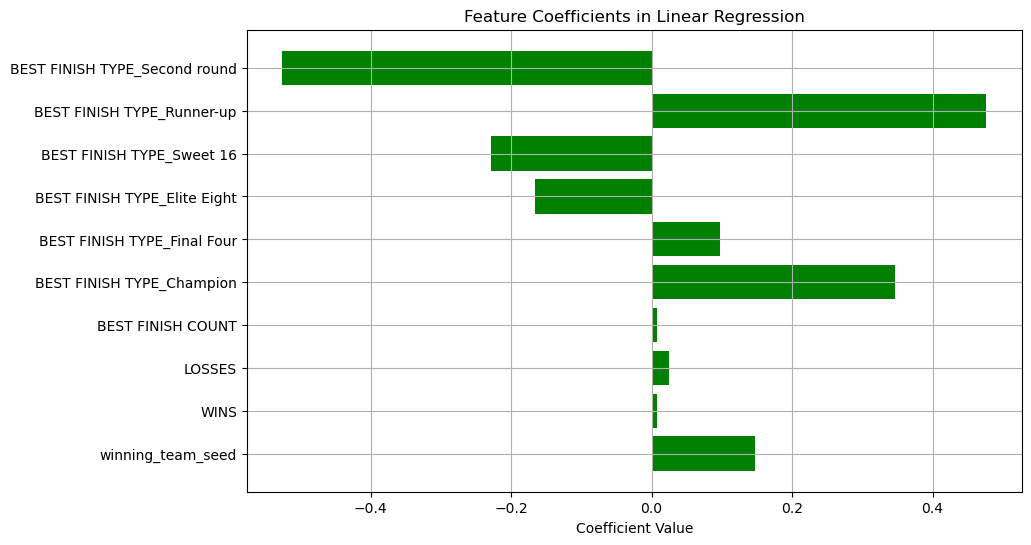

In [292]:
coef_names = X.columns
coefs = model.coef_

plt.figure(figsize=(10, 6))
plt.barh(coef_names, coefs, color='green')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Linear Regression')
plt.grid(True)
plt.show()


### Ridge

In [293]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge:")
print(f"mse: {ridge_mse}")
print(f"R-Squared: {ridge_r2}")

Ridge:
mse: 1.1438869719781914
R-Squared: 0.2517380366541131


### Lasso

In [294]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("Lasso:")
print(f"mse: {lasso_mse}")
print(f"R-Squared: {lasso_r2}")

Lasso:
mse: 1.152723245515144
R-Squared: 0.2459578786949862


# Analysis Question 5: 
# Based off historical data, how many total upsets will there be in the next 5 tournaments (2025-2029)? 

C:\Users\ellah\anaconda3\Anaconda3.12.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ellah\anaconda3\Anaconda3.12.4\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\ellah\anaconda3\Anaconda3.12.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ellah\anaconda3\Anaconda3.12.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


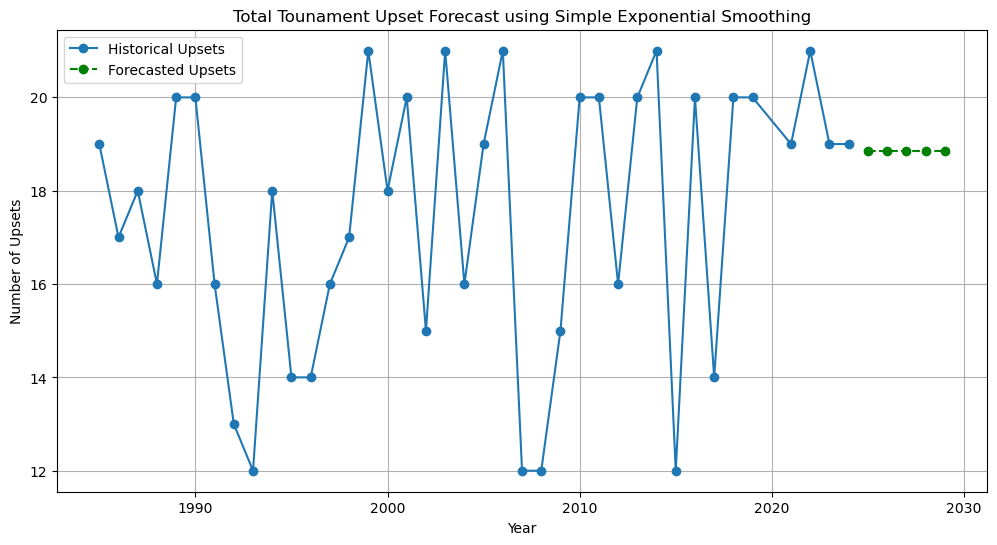

,year,forecasted_upsets
39,2025,18.861097
40,2026,18.861097
41,2027,18.861097
42,2028,18.861097
43,2029,18.861097


MAE: 2.620307770711131


In [295]:
#Create the time series 
ts = upsets_per_year.sort_values('year').set_index('year')['upset_count']
model = SimpleExpSmoothing(ts).fit(smoothing_level=0.2)

#decide how far the model should forecast 
forecast_steps = 5
forecast = model.forecast(forecast_steps)

#plot the forecast 
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts.values, label='Historical Upsets', marker='o')
plt.plot(forecast_years, forecast, label='Forecasted Upsets', linestyle='--', marker='o' , color='green')
plt.title('Total Tounament Upset Forecast using Simple Exponential Smoothing')
plt.xlabel('Year')
plt.ylabel('Number of Upsets')
plt.legend()
plt.grid(True)
plt.show()

#display the forecasted results to a dataframe
forecast_df = pd.DataFrame({
    'year': forecast_years,
    'forecasted_upsets': forecast
})
display(forecast_df)
#Get the MAE of the model 
mae_values = model.fittedvalues
mae = mean_absolute_error(ts, mae_values)
print(f"MAE: {mae}")